In [1]:
! pip install pymongo

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 31.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 313.6/313.6 kB 21.0 MB/s eta 0:00:00


In [2]:
from pymongo import MongoClient
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [4]:
# Datos de conexión
usuario = "madris1402"
password = "maranes8"
cluster = "clusterrmu.s1ici9p.mongodb.net"
base_datos = "analytics"
coleccion = "sales_cubo"

# Cadena de conexión
uri = f"mongodb+srv://{usuario}:{password}@{cluster}/?retryWrites=true&w=majority"
# Crear cliente
client = MongoClient(uri)

#Madrigal Urencio Ricardo
client

MongoClient(host=['ac-tljpgji-shard-00-01.s1ici9p.mongodb.net:27017', 'ac-tljpgji-shard-00-02.s1ici9p.mongodb.net:27017', 'ac-tljpgji-shard-00-00.s1ici9p.mongodb.net:27017'], document_class=dict, tz_aware=False, connect=True, retrywrites=True, w='majority', authsource='admin', replicaset='atlas-10ra0l-shard-0', tls=True)

In [6]:
#Conexion a la DB
db = client[base_datos]
coll = db[coleccion]

print(db)
print(coll)

Database(MongoClient(host=['ac-tljpgji-shard-00-01.s1ici9p.mongodb.net:27017', 'ac-tljpgji-shard-00-02.s1ici9p.mongodb.net:27017', 'ac-tljpgji-shard-00-00.s1ici9p.mongodb.net:27017'], document_class=dict, tz_aware=False, connect=True, retrywrites=True, w='majority', authsource='admin', replicaset='atlas-10ra0l-shard-0', tls=True), 'analytics')
Collection(Database(MongoClient(host=['ac-tljpgji-shard-00-01.s1ici9p.mongodb.net:27017', 'ac-tljpgji-shard-00-02.s1ici9p.mongodb.net:27017', 'ac-tljpgji-shard-00-00.s1ici9p.mongodb.net:27017'], document_class=dict, tz_aware=False, connect=True, retrywrites=True, w='majority', authsource='admin', replicaset='atlas-10ra0l-shard-0', tls=True), 'analytics'), 'sales_cubo')


In [10]:
print(client.list_database_names())
print(db.list_collection_names())
print(coll.count_documents({}))
print(coll.find_one())

['agendafes', 'analytics', 'sample_mflix', 'admin', 'local']
['clientes_america', 'sales_cubo']
1952
{'_id': ObjectId('68484a5f38be2dbad0ea7e0f'), 'sales_id': 1, 'profit': 4.56, 'units_sold': 8, 'price_per_unit': 207.55, 'discount': 37.2, 'total_cost': 1957.4, 'profit_margin': -297, 'date': '2023-03-06', 'year': 2023, 'month': 3, 'month_name': 'March', 'day': 6, 'day_name': 'Monday', 'is_weekend': False, 'quarter': 1, 'week': 10, 'continent': 'Europe', 'country_name': 'Italy', 'country_code': 'IT', 'region': 'Sicily', 'product': 'SANFORD Liquid Accent Tank-Style Highlighters', 'category': 'Office Supplies', 'customer': 'Kim Mathis', 'gender': 'Non-Binary', 'age': 37, 'occupation': 'Medical sales representative', 'address': '20969 Ian Island Apt. 917\nWest Julie, MI 42380', 'phone': '(675)289-5392', 'email': 'janet69@rogers.com'}


In [27]:
query = {"time": {"$exists": False}}
result = coll.find(query)
print(result)
result = list(result)
print(len(result))
result[0]

1300


{'_id': ObjectId('68484a5f38be2dbad0ea7e0f'),
 'sales_id': 1,
 'profit': 4.56,
 'units_sold': 8,
 'price_per_unit': 207.55,
 'discount': 37.2,
 'total_cost': 1957.4,
 'profit_margin': -297,
 'date': '2023-03-06',
 'year': 2023,
 'month': 3,
 'month_name': 'March',
 'day': 6,
 'day_name': 'Monday',
 'is_weekend': False,
 'quarter': 1,
 'week': 10,
 'continent': 'Europe',
 'country_name': 'Italy',
 'country_code': 'IT',
 'region': 'Sicily',
 'product': 'SANFORD Liquid Accent Tank-Style Highlighters',
 'category': 'Office Supplies',
 'customer': 'Kim Mathis',
 'gender': 'Non-Binary',
 'age': 37,
 'occupation': 'Medical sales representative',
 'address': '20969 Ian Island Apt. 917\nWest Julie, MI 42380',
 'phone': '(675)289-5392',
 'email': 'janet69@rogers.com'}

In [13]:
df = pd.DataFrame(result)
df

,_id,sales_id,profit,units_sold,price_per_unit,discount,total_cost,profit_margin,continent,country_name,...,product,category,customer,gender,age,address,email,time,occupation,phone
0,68484b8e38be2dbad0ea8323,1301,-411.2360,80,297.92,48.79,89.17,23744.43,Asia,China,...,Belkin 105-Key Black Keyboard,Furniture,Emily Mitchell,Female,39,"16558 Fischer Flat\nPorterton, DC 94032",qanderson@diaz.com,"{'date': '2016-12-21', 'year': 2016, 'month': ...",NaN,NaN
1,68484b8e38be2dbad0ea8324,1302,-48.9720,87,306.79,42.46,2656.37,24034.36,North America,Guatemala,...,Panasonic KX-P2130 Dot Matrix Printer,Technology,Derrick Smith,Male,53,"79252 Ayala Ports Apt. 380\nPort Michellebury,...",NaN,"{'date': '2019-09-17', 'year': 2019, 'month': ...",NaN,NaN
2,68484b8e38be2dbad0ea8325,1303,62.2980,21,390.07,6.35,1973.81,6217.66,South America,Colombia,...,Boston 16765 Mini Stand Up Battery Pencil Shar...,Furniture,Benjamin Jones,Female,52,"771 Gill Island Apt. 556\nNew Michelleberg, KS...",vclark@krueger-smith.com,"{'date': '2019-05-23', 'year': 2019, 'month': ...",Theatre manager,NaN
3,68484b8e38be2dbad0ea8326,1304,-119.3200,33,375.71,46.26,2858.69,9539.74,Oceania,Papua New Guinea,...,Xerox 1904,Office Supplies,Mark Simmons,Non-Binary,24,"47859 Carr Radial Apt. 557\nPort Emily, ME 81042",lsoto@sandoval.com,"{'date': '2023-12-22', 'year': 2023, 'month': ...","Psychologist, counselling",966.033.4191x825
4,68484b8e38be2dbad0ea8327,1305,756.6747,38,262.97,26.26,260.52,9732.34,North America,Canada,...,Advantus Plastic Paper Clips,Office Supplies,Kathleen Gray,Non-Binary,27,"4529 Kimberly Estates\nDanieltown, OK 89282",NaN,"{'date': '2023-06-13', 'year': 2023, 'month': ...","Pharmacist, community",NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
647,68484b8e38be2dbad0ea85aa,1948,-116.7600,18,328.07,38.71,728.76,5176.50,North America,Guatemala,...,Crate-A-Files,Office Supplies,Brittany Powers,Female,35,72368 Ortiz Overpass Suite 772\nNew Anthonybur...,kevinwhite@thomas.org,"{'date': '2020-01-25', 'year': 2020, 'month': ...",NaN,(627)828-2742x2579
648,68484b8e38be2dbad0ea85ab,1949,-160.9520,69,294.85,42.46,91.82,20252.83,Africa,Morocco,...,Belkin 105-Key Black Keyboard,Technology,Tyler Reyes,Non-Binary,80,"806 Castillo Tunnel\nCoopershire, MD 51406",jason24@griffin-hernandez.org,"{'date': '2016-12-28', 'year': 2016, 'month': ...",NaN,NaN
649,68484b8e38be2dbad0ea85ac,1950,-41.8700,42,5.52,22.72,2012.95,-1781.11,North America,Canada,...,Staples SlimLine Pencil Sharpener,Office Supplies,Gary Mcclure,Male,34,79327 Lauren Bypass Suite 054\nNorth Matthewfu...,NaN,"{'date': '2017-05-11', 'year': 2017, 'month': ...",NaN,001-154-100-6762x676
650,68484b8e38be2dbad0ea85ad,1951,-24.7104,2,121.41,34.01,2441.85,-2199.03,Asia,Japan,...,Eldon Image Series Black Desk Accessories,Furniture,Amy Villanueva,Female,34,443 Brandon Ports Suite 205\nSouth Christopher...,bbush@hotmail.com,"{'date': '2018-01-27', 'year': 2018, 'month': ...",NaN,(962)015-3368


In [16]:
query = {"time": {"$exists": True}}
result = coll.find(query)
df = pd.DataFrame(result)
df

,_id,sales_id,profit,units_sold,price_per_unit,discount,total_cost,profit_margin,continent,country_name,...,product,category,customer,gender,age,address,email,time,occupation,phone
0,68484b8e38be2dbad0ea8323,1301,-411.2360,80,297.92,48.79,89.17,23744.43,Asia,China,...,Belkin 105-Key Black Keyboard,Furniture,Emily Mitchell,Female,39,"16558 Fischer Flat\nPorterton, DC 94032",qanderson@diaz.com,"{'date': '2016-12-21', 'year': 2016, 'month': ...",NaN,NaN
1,68484b8e38be2dbad0ea8324,1302,-48.9720,87,306.79,42.46,2656.37,24034.36,North America,Guatemala,...,Panasonic KX-P2130 Dot Matrix Printer,Technology,Derrick Smith,Male,53,"79252 Ayala Ports Apt. 380\nPort Michellebury,...",NaN,"{'date': '2019-09-17', 'year': 2019, 'month': ...",NaN,NaN
2,68484b8e38be2dbad0ea8325,1303,62.2980,21,390.07,6.35,1973.81,6217.66,South America,Colombia,...,Boston 16765 Mini Stand Up Battery Pencil Shar...,Furniture,Benjamin Jones,Female,52,"771 Gill Island Apt. 556\nNew Michelleberg, KS...",vclark@krueger-smith.com,"{'date': '2019-05-23', 'year': 2019, 'month': ...",Theatre manager,NaN
3,68484b8e38be2dbad0ea8326,1304,-119.3200,33,375.71,46.26,2858.69,9539.74,Oceania,Papua New Guinea,...,Xerox 1904,Office Supplies,Mark Simmons,Non-Binary,24,"47859 Carr Radial Apt. 557\nPort Emily, ME 81042",lsoto@sandoval.com,"{'date': '2023-12-22', 'year': 2023, 'month': ...","Psychologist, counselling",966.033.4191x825
4,68484b8e38be2dbad0ea8327,1305,756.6747,38,262.97,26.26,260.52,9732.34,North America,Canada,...,Advantus Plastic Paper Clips,Office Supplies,Kathleen Gray,Non-Binary,27,"4529 Kimberly Estates\nDanieltown, OK 89282",NaN,"{'date': '2023-06-13', 'year': 2023, 'month': ...","Pharmacist, community",NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
647,68484b8e38be2dbad0ea85aa,1948,-116.7600,18,328.07,38.71,728.76,5176.50,North America,Guatemala,...,Crate-A-Files,Office Supplies,Brittany Powers,Female,35,72368 Ortiz Overpass Suite 772\nNew Anthonybur...,kevinwhite@thomas.org,"{'date': '2020-01-25', 'year': 2020, 'month': ...",NaN,(627)828-2742x2579
648,68484b8e38be2dbad0ea85ab,1949,-160.9520,69,294.85,42.46,91.82,20252.83,Africa,Morocco,...,Belkin 105-Key Black Keyboard,Technology,Tyler Reyes,Non-Binary,80,"806 Castillo Tunnel\nCoopershire, MD 51406",jason24@griffin-hernandez.org,"{'date': '2016-12-28', 'year': 2016, 'month': ...",NaN,NaN
649,68484b8e38be2dbad0ea85ac,1950,-41.8700,42,5.52,22.72,2012.95,-1781.11,North America,Canada,...,Staples SlimLine Pencil Sharpener,Office Supplies,Gary Mcclure,Male,34,79327 Lauren Bypass Suite 054\nNorth Matthewfu...,NaN,"{'date': '2017-05-11', 'year': 2017, 'month': ...",NaN,001-154-100-6762x676
650,68484b8e38be2dbad0ea85ad,1951,-24.7104,2,121.41,34.01,2441.85,-2199.03,Asia,Japan,...,Eldon Image Series Black Desk Accessories,Furniture,Amy Villanueva,Female,34,443 Brandon Ports Suite 205\nSouth Christopher...,bbush@hotmail.com,"{'date': '2018-01-27', 'year': 2018, 'month': ...",NaN,(962)015-3368


In [22]:
query = {"time": {"$exists": True}}
result = coll.find(query)
df = pd.json_normalize(result)
print(df.columns)
df.head()

Index(['_id', 'sales_id', 'profit', 'units_sold', 'price_per_unit', 'discount',
       'total_cost', 'profit_margin', 'continent', 'country_name',
       'country_code', 'region', 'product', 'category', 'customer', 'gender',
       'age', 'address', 'email', 'time.date', 'time.year', 'time.month',
       'time.month_name', 'time.day', 'time.day_name', 'time.is_weekend',
       'time.quarter', 'time.week', 'occupation', 'phone'],
      dtype='object')


,_id,sales_id,profit,units_sold,price_per_unit,discount,total_cost,profit_margin,continent,country_name,...,time.year,time.month,time.month_name,time.day,time.day_name,time.is_weekend,time.quarter,time.week,occupation,phone
0,68484b8e38be2dbad0ea8323,1301,-411.2360,80,297.92,48.79,89.17,23744.43,Asia,China,...,2016,12,December,21,Wednesday,False,4,51,NaN,NaN
1,68484b8e38be2dbad0ea8324,1302,-48.9720,87,306.79,42.46,2656.37,24034.36,North America,Guatemala,...,2019,9,September,17,Tuesday,False,3,37,NaN,NaN
2,68484b8e38be2dbad0ea8325,1303,62.2980,21,390.07,6.35,1973.81,6217.66,South America,Colombia,...,2019,5,May,23,Thursday,False,2,20,Theatre manager,NaN
3,68484b8e38be2dbad0ea8326,1304,-119.3200,33,375.71,46.26,2858.69,9539.74,Oceania,Papua New Guinea,...,2023,12,December,22,Friday,False,4,51,"Psychologist, counselling",966.033.4191x825
4,68484b8e38be2dbad0ea8327,1305,756.6747,38,262.97,26.26,260.52,9732.34,North America,Canada,...,2023,6,June,13,Tuesday,False,2,24,"Pharmacist, community",NaN


In [23]:
query = { }
result = coll.find(query)
df = pd.json_normalize(result)
print(df.columns)
df.head()

Index(['_id', 'sales_id', 'profit', 'units_sold', 'price_per_unit', 'discount',
       'total_cost', 'profit_margin', 'date', 'year', 'month', 'month_name',
       'day', 'day_name', 'is_weekend', 'quarter', 'week', 'continent',
       'country_name', 'country_code', 'region', 'product', 'category',
       'customer', 'gender', 'age', 'occupation', 'address', 'phone', 'email',
       'time.date', 'time.year', 'time.month', 'time.month_name', 'time.day',
       'time.day_name', 'time.is_weekend', 'time.quarter', 'time.week'],
      dtype='object')


,_id,sales_id,profit,units_sold,price_per_unit,discount,total_cost,profit_margin,date,year,...,email,time.date,time.year,time.month,time.month_name,time.day,time.day_name,time.is_weekend,time.quarter,time.week
0,68484a5f38be2dbad0ea7e0f,1,4.5600,8,207.55,37.20,1957.40,-297.00,2023-03-06,2023.0,...,janet69@rogers.com,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,68484a5f38be2dbad0ea7e10,2,4390.3665,100,463.81,49.28,2395.09,43985.91,2018-04-24,2018.0,...,jford@huang.com,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,68484a5f38be2dbad0ea7e11,3,-53.8096,83,344.50,32.12,484.03,28109.47,2018-02-18,2018.0,...,christopher25@ponce-hale.biz,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,68484a5f38be2dbad0ea7e12,4,803.4705,61,185.32,17.12,2534.73,8769.79,2017-10-13,2017.0,...,gabrieltucker@hancock.com,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,68484a5f38be2dbad0ea7e13,5,-24.0300,76,183.39,4.86,2854.89,11082.75,2021-07-10,2021.0,...,obrown@carpenter.com,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [30]:
query = {"time": {"$exists": False}}
result = coll.find(query).sort("continent", 1).limit(3)
print(result)
result = list(result)
print(len(result))
result[0]

3


{'_id': ObjectId('68484a5f38be2dbad0ea7e2a'),
 'sales_id': 28,
 'profit': -6923.5992,
 'units_sold': 73,
 'price_per_unit': 256.54,
 'discount': 32.11,
 'total_cost': 2419.81,
 'profit_margin': 16307.61,
 'date': '2016-01-25',
 'year': 2016,
 'month': 1,
 'month_name': 'January',
 'day': 25,
 'day_name': 'Monday',
 'is_weekend': False,
 'quarter': 1,
 'week': 4,
 'continent': 'Africa',
 'country_name': 'South Africa',
 'country_code': 'ZA',
 'region': 'Gauteng',
 'product': 'Okidata Pacemark 4410N Wide Format Dot Matrix Printer',
 'category': 'Technology',
 'customer': 'Allison Maddox',
 'gender': 'Female',
 'age': 77,
 'occupation': 'Administrator, arts',
 'address': '4303 Christopher Oval\nPort Amandaberg, TN 62797',
 'phone': '281.489.3252x88095',
 'email': 'kayla51@graham-chavez.com'}

In [35]:
query = {"continent": "Africa"}
project = {"_id": 0, "continent": 1, "profit": 1, "product": 1, "units_sold": 1}
result = coll.find(query, project).sort("continent", 1).limit(3)
print(result)
result = list(result)
print(len(result))
result[0]
print(result)

3
[{'profit': 2.63, 'units_sold': 18, 'continent': 'Africa', 'product': 'Staples SlimLine Pencil Sharpener'}, {'profit': 209.997, 'units_sold': 77, 'continent': 'Africa', 'product': 'StarTAC 7797'}, {'profit': -6923.5992, 'units_sold': 73, 'continent': 'Africa', 'product': 'Okidata Pacemark 4410N Wide Format Dot Matrix Printer'}]


In [37]:
pipeline = [
    {
        "$group": {
            "_id": {"year": "$year", "continent": "$continent"},
            "nreg": {"$sum": 1},
            "totalProfit": {"$sum": "$profit"}
        }
    },
    {
        "$project": {
            "_id": 0,
            "year": "$_id.year",
            "continent": "$_id.continent",
            "nreg": 1,
            "totalProfit": 1
        }
    },
    {"$sort": {"year": 1, "continent": 1}}
]

result = list(coll.aggregate(pipeline))
result

[{'nreg': 90, 'totalProfit': 12406.615608, 'continent': 'Africa'},
 {'nreg': 109, 'totalProfit': 3312.8888109999994, 'continent': 'Asia'},
 {'nreg': 116, 'totalProfit': 23026.5737716, 'continent': 'Europe'},
 {'nreg': 105, 'totalProfit': 17490.8106, 'continent': 'North America'},
 {'nreg': 106, 'totalProfit': 25751.2634, 'continent': 'Oceania'},
 {'nreg': 126, 'totalProfit': 21587.69919, 'continent': 'South America'},
 {'nreg': 17, 'totalProfit': 258.9276, 'year': 2015, 'continent': 'Africa'},
 {'nreg': 27, 'totalProfit': 4547.5177, 'year': 2015, 'continent': 'Asia'},
 {'nreg': 15, 'totalProfit': 2320.2307, 'year': 2015, 'continent': 'Europe'},
 {'nreg': 21,
  'totalProfit': -111.64857999999991,
  'year': 2015,
  'continent': 'North America'},
 {'nreg': 28,
  'totalProfit': 4296.7065999999995,
  'year': 2015,
  'continent': 'Oceania'},
 {'nreg': 30,
  'totalProfit': -498.82050000000004,
  'year': 2015,
  'continent': 'South America'},
 {'nreg': 24, 'totalProfit': -1708.13594, 'year': 2

In [38]:
df = pd.DataFrame(result)
df

,nreg,totalProfit,continent,year
0,90,12406.615608,Africa,NaN
1,109,3312.888811,Asia,NaN
2,116,23026.573772,Europe,NaN
3,105,17490.810600,North America,NaN
4,106,25751.263400,Oceania,NaN
5,126,21587.699190,South America,NaN
6,17,258.927600,Africa,2015.0
7,27,4547.517700,Asia,2015.0
8,15,2320.230700,Europe,2015.0
9,21,-111.648580,North America,2015.0


In [39]:
df.pivot(index="year", columns="continent", values="totalProfit")

continent,Africa,Asia,Europe,North America,Oceania,South America
year,,,,,,
NaN,12406.615608,3312.888811,23026.573772,17490.810600,25751.263400,21587.699190
2015.0,258.927600,4547.517700,2320.230700,-111.648580,4296.706600,-498.820500
2016.0,-1708.135940,-1021.056420,200.962700,1273.918200,8044.511760,1307.738500
2017.0,682.703400,-649.668044,-962.837200,5780.801440,-1251.206740,4338.505100
2018.0,-1243.991025,7134.826120,3482.121610,6166.073840,4295.648635,2664.832540
2019.0,1368.647960,-1437.139814,12172.503330,2335.017163,439.629760,812.247500
2020.0,-5981.978988,11567.102200,13400.881800,-1622.049666,-15754.030960,6468.324937
2021.0,19872.337880,-387.020480,-351.283661,-4892.430560,3876.372470,2605.109774
2022.0,1888.631055,5337.431200,654.294220,205.128600,1744.918020,-3964.356776


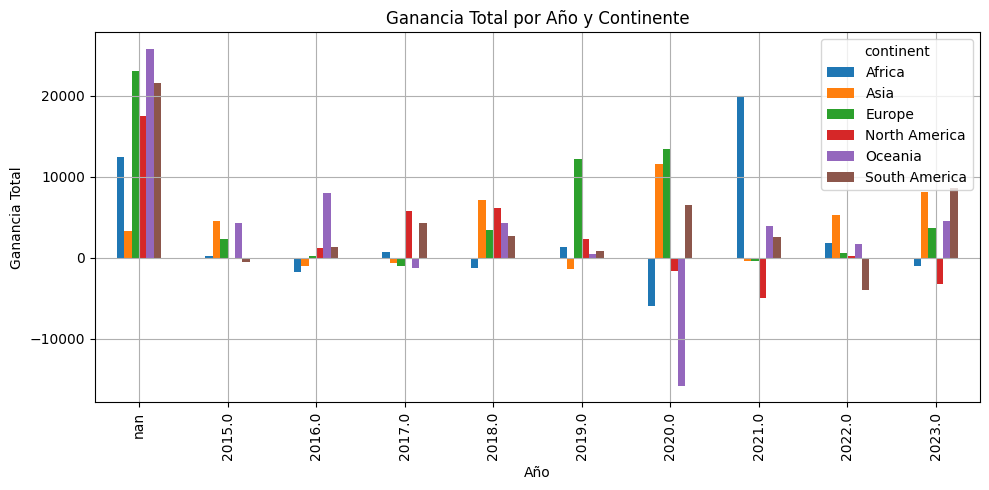

In [41]:
df.pivot(index="year", columns="continent", values="totalProfit").plot(
    kind="bar", figsize=(10, 5),
    title="Ganancia Total por Año y Continente"
)
plt.xlabel("Año")
plt.ylabel("Ganancia Total")
plt.grid(True)
plt.tight_layout()
plt.show()

In [44]:
pipeline = [
    {
        "$group": {
            "_id": "$region",
            "clientes": {
                "$addToSet": {
                    "$concat": ["$customer", " - ", "$country_name"]
                }
            }
        }
    },
    {
        "$project": {
            "region": "$_id",
            "clientes": {
                "$sortArray": {
                    "input": "$clientes",
                    "sortBy": 1
                }
            },
            "_id": 0
        }
    },
    {
        "$sort": {
            "region": 1
        }
    }
]

result = list(coll.aggregate(pipeline))
result[0]

{'region': 'Abuja',
 'clientes': ['Antonio Keller - Nigeria',
  'Brandon Evans - Nigeria',
  'Brittany Powers - Nigeria',
  'Christina Matthews - Nigeria',
  'Cody Simmons - Nigeria',
  'Desiree Garrison - Nigeria',
  'Elizabeth Jensen - Nigeria',
  'Eric Webster - Nigeria',
  'Janet Vaughn - Nigeria',
  'Jennifer Walters - Nigeria',
  'Kathleen Gray - Nigeria',
  'Kristin Lopez - Nigeria',
  'Linda Hudson - Nigeria',
  'Linda Wolfe - Nigeria',
  'Megan Richardson - Nigeria',
  'Nathan Richards - Nigeria',
  'Patrick Griffin - Nigeria',
  'Patrick Hernandez - Nigeria',
  'Valerie Kennedy - Nigeria']}

In [45]:
df = pd.DataFrame(result)
df


,region,clientes
0,Abuja,"[Antonio Keller - Nigeria, Brandon Evans - Nig..."
1,Alexandria,"[Angela Williams - Egypt, Brandi Ferguson - Eg..."
2,Andalusia,"[Adrienne Ellis - Spain, Brooke Leonard - Spai..."
3,Arequipa,"[Benjamin Miller - Peru, Brandon May - Peru, B..."
4,Auckland,"[Brent Kidd - New Zealand, Brett Castillo - Ne..."
...,...,...
85,Valencia,"[Brian Decker - Venezuela, Brittany Powers - V..."
86,Victoria,"[Angela Williams - Australia, Caitlin Dodson -..."
87,Wales,"[Allison Maddox - United Kingdom, Antonio Kell..."
88,Wellington,"[Allison Maddox - New Zealand, Cheryl Gray - N..."


In [46]:
result = list(coll.aggregate(pipeline))
renglones_expandidos = []
for doc in result:
    for cliente in doc["clientes"]:
        renglones_expandidos.append({
            "region": doc["region"],
            "cliente_pais": cliente
        })
df = pd.DataFrame(renglones_expandidos)
df

,region,cliente_pais
0,Abuja,Antonio Keller - Nigeria
1,Abuja,Brandon Evans - Nigeria
2,Abuja,Brittany Powers - Nigeria
3,Abuja,Christina Matthews - Nigeria
4,Abuja,Cody Simmons - Nigeria
...,...,...
1743,Western Cape,Misty Boone - South Africa
1744,Western Cape,Ryan Meyer - South Africa
1745,Western Cape,Sarah Riley - South Africa
1746,Western Cape,Stacey Clark - South Africa
